keras 패키지를 활용한 CNN 구현 실습

In [ ]:
import tensorflow as tf          #딥러닝 패키지
import numpy as np               #배열계산 패키지
import matplotlib.pyplot as plt  #시각화 패키지

1. MNIST Data 불러오기




In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


2. MNIST 데이터 전처리 수행

In [ ]:
# MNIST 데이터의 0~255 픽셀 값을 0에서 1 사이값으로 scale하고, 데이터 타입을 float32로 변경해준다.

# Keras 패키지에서는 입력데이터가 float 이어야 하기 때문.
# 또한, 일반적으로 딥러닝은 input 값에 대하여 스케일리 해주어야 한다.

# 이미지 값 변환
train_images = np.array(train_images/255.0, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)

# 라벨 값 변환
train_labels = np.array(train_labels, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 라벨값을 원핫인코딩(One-Hot-Encoding) 해주어야 함

from tensorflow.keras.utils import to_categorical

train_labels_2 = to_categorical(train_labels)
test_labels_2 = to_categorical(test_labels)

In [ ]:
# 학습데이터를 학습데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels_2, test_size=0.3, random_state=1)

train_x.shape, val_x.shape, train_y.shape, val_y.shape

((42000, 28, 28), (18000, 28, 28), (42000, 10), (18000, 10))

3. CNN 모델의 구조 설계

In [ ]:
# 필요 패키지 불러오기

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D # Input이란게 생기네
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model # 오,,이것도 모야? -> 함수적 방식

In [ ]:
# ★ 가볍게 만든 거랑 무겁게 만든거랑 정확도 차이랑 모델 모양 차이 확인해라!!!!!!!!

# Keras Functional Coding 방법 = Sequential을 안하고 함수적으로 쓰는게 더 보편적이다 -> 아까는 sequential과 model을 선언하고 add로 쌓았는데 이제는 층과 층 하나하나를 정리하고 연결하는 개념
# 계속 뒤에 이어주면서 작성할 수 있다,


# 1을 넣는 이유 : 흑백이라서 그렇데 2차원이라도 1, 3을 꼭 넣어야하나봐 = 3차원으로 만들어줘야한다
input_layer = Input(shape=(28, 28, 1))
conv_layer = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer) # 필터로 32개로 뿔림
conv_layer = Conv2D(filters=64, kernel_size=3, activation='relu')(conv_layer)
pooling_layer = MaxPooling2D(2)(conv_layer) # 2의 의미 4*4면 둘로 나눠서 2*2로 만들겠다 28*28 = 14*14

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야함 13*13*64의 1차원 배열이 됨
flat_layer = Flatten()(pooling_layer)
output = Dense(100, activation='relu')(flat_layer)
output = Dense(10, activation='softmax')(output)

model = Model(inputs=input_layer, outputs=output) # 내 모델은 여기서 시작해서 여기서 끝낼 거야 라는 뜻

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                             

4. CNN 모델의 손실함수(Loss)와 최적화함수(Optimizer) 설정

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

5. CNN 모델 학습 수행 및 성능평가

In [ ]:
epochs = 5
batch_size = 128 #주로 2의 배수로 선정함

history = model.fit(x=train_x, y=train_y, batch_size=batch_size, validation_data=(val_x, val_y), 
                    epochs=epochs, verbose=1)

Epoch 1/5
329/329 [==============================] - 15s 11ms/step - loss: 0.1972 - accuracy: 0.9416 - val_loss: 0.0723 - val_accuracy: 0.9780
Epoch 2/5
329/329 [==============================] - 3s 11ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0609 - val_accuracy: 0.9816
Epoch 3/5
329/329 [==============================] - 3s 10ms/step - loss: 0.0307 - accuracy: 0.9905 - val_loss: 0.0477 - val_accuracy: 0.9863
Epoch 4/5
329/329 [==============================] - 3s 10ms/step - loss: 0.0218 - accuracy: 0.9929 - val_loss: 0.0470 - val_accuracy: 0.9870
Epoch 5/5
329/329 [==============================] - 4s 11ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0490 - val_accuracy: 0.9854


In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
# 딥러닝에서는 accuracy를 계산하는데 model.evaluate를 model.score 대신 사용함
# 첫번째 결과값은 loss, 두번째 결과값은 accuracy를 의미함

model.evaluate(test_images, test_labels_2, verbose=0)

[0.040525443851947784, 0.9873999953269958]

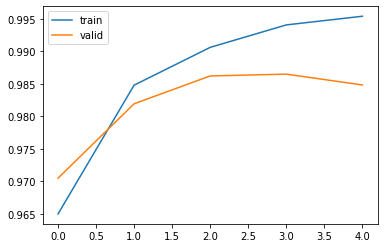

In [ ]:
# 시각화를 통하여 학습이 잘 이루어지고 있는지 확인

import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

6. Dropout을 적용하여 Fully Connected Layer의 오버피팅 조정

In [ ]:
# CNN은 일반적으로 Dense Layer보다는 파라미터수 작음
# 하지만 많은 Filter 들을 적용하고 이를  Fully Connected Layer로 연결 시 파라미터 수가 늘어남
# Flatten() 이후 Dropout을 적용하여 특정 비율로 FC Layer 연결을 누락 적용

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)   # 이 부분에 추가
x = Dense(100, activation='relu')(x)

output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

In [ ]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs = 5
batch_size = 128 #주로 2의 배수로 선정함

history = model.fit(x=train_x, y=train_y, batch_size=batch_size, validation_data=(val_x, val_y), 
                    epochs=epochs, verbose=1)

model.evaluate(test_images, test_labels_2, verbose=0)